<a href="https://colab.research.google.com/github/iihsan23/pasmp1/blob/main/pas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_test.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [3]:
df = df[(df["size"] == "L") | (df["size"] == "M")]

In [4]:
df

,weight,age,height,size
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
6,53,65.0,160.02,M
...,...,...,...,...
119724,54,22.0,165.10,M
119725,61,32.0,172.72,M
119728,56,36.0,167.64,M
119729,63,42.0,175.26,M


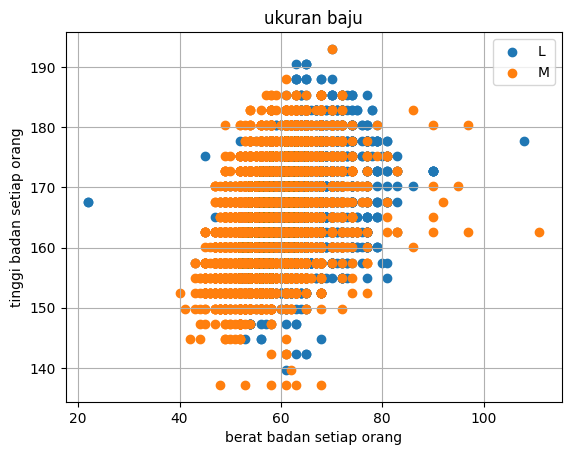

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for size, d in df.groupby('size'):
    ax.scatter(d['weight'], d['height'], label=size)

plt.legend()
plt.title('ukuran baju')
plt.xlabel('berat badan setiap orang')
plt.ylabel('tinggi badan setiap orang')
plt.grid(True)
plt.show()

In [6]:
df = df.dropna()
df

,weight,age,height,size
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
6,53,65.0,160.02,M
...,...,...,...,...
119724,54,22.0,165.10,M
119725,61,32.0,172.72,M
119728,56,36.0,167.64,M
119729,63,42.0,175.26,M


In [7]:
import numpy as np

x_train = np.array(df[['weight', 'height']])
y_train = np.array(df['size'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[ 59.   167.64]
 [ 61.   165.1 ]
 [ 65.   175.26]
 ...
 [ 56.   167.64]
 [ 63.   175.26]
 [ 61.   172.72]]

y_train: ['L' 'M' 'L' ... 'M' 'M' 'M']


In [8]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

print(f'y_train:\n,{y_train}')

y_train:
,[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [9]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 1 0 ... 1 1 1]


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(f'y_train: {y_train}')

y_train: [0 1 0 ... 1 1 1]


In [11]:
print(x_train.shape)
print(y_train.shape)


(47056, 2)
(47056,)


In [12]:
min_samples = min(len(x_train), len(y_train))
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]


In [13]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
height = 175
weight = 80

x_new = np.array([[height, weight]]).reshape(1, -1)
x_new

array([[175,  80]])

In [15]:
y_new = model.predict(x_new)
y_new

array([1])

In [16]:
y_new = model.predict(x_new)
y_new = y_new.reshape(-1, 1) # Reshape y_new to have a second dimension
lb.inverse_transform(y_new)

array(['M'], dtype='<U1')

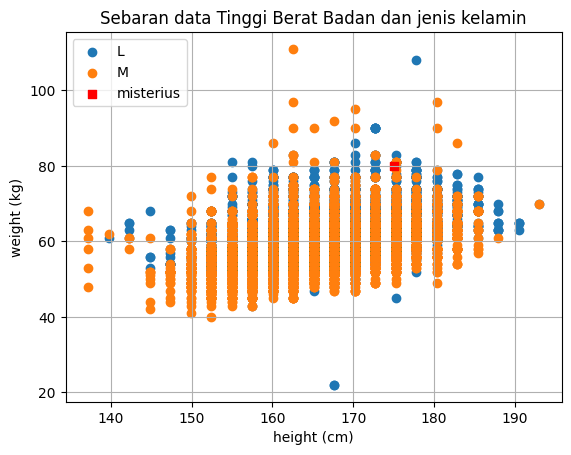

In [17]:
# Visualisasi nearest Neighours'
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for size, d in df.groupby('size'):
    ax.scatter(d['height'], d['weight'], label=size)
plt.scatter(
    height,
    weight,
    marker='s',
    color='red',
    label='misterius'
)

plt.legend(loc='upper left')
plt.title('Sebaran data Tinggi Berat Badan dan jenis kelamin')
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.grid(True)
plt.show()

In [18]:
# kalkulasi Distance (Euclidean Distance)
misterius = np.array([height, weight])
misterius

array([175,  80])

In [19]:
x_train

array([[ 59.  , 167.64],
       [ 61.  , 165.1 ],
       [ 65.  , 175.26],
       ...,
       [ 56.  , 167.64],
       [ 63.  , 175.26],
       [ 61.  , 172.72]])

In [20]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in x_train]
data_jarak

[145.3849015544599,
 142.26035990394513,
 145.5144927490042,
 146.171127107921,
 145.90133789653885,
 149.4047174623345,
 139.8678304686249,
 146.73854435696165,
 139.07555500518413,
 142.2138164877098,
 145.39944429054742,
 142.2138164877098,
 144.23314598246827,
 148.4190028264575,
 147.9290708414002,
 143.8645140401204,
 142.26035990394513,
 149.28495704524283,
 142.2407550598632,
 142.2407550598632,
 143.6807238289117,
 144.0312591071813,
 146.94556270946055,
 140.75565210676265,
 142.00052957647728,
 144.6755335224308,
 139.07555500518413,
 152.4318457540943,
 150.63915028969063,
 143.19620665366804,
 132.0043696246454,
 145.39944429054742,
 138.3104103095642,
 147.91602482489853,
 146.2976759897436,
 146.94556270946055,
 140.64412394408802,
 146.48260511064103,
 142.2138164877098,
 141.16355903702626,
 147.72079203686934,
 142.2138164877098,
 149.44510697911792,
 144.83491844165204,
 145.35622587285349,
 140.64412394408802,
 143.19620665366804,
 142.2407550598632,
 147.0321991945

In [21]:
df['jarak'] = data_jarak
df.sort_values(['jarak'])

<ipython-input-21-6fed39a5c501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jarak'] = data_jarak


,weight,age,height,size,jarak
63111,111,53.0,162.56,M,104.461254
53205,97,33.0,162.56,M,113.578843
93890,90,33.0,162.56,M,118.495374
96339,108,27.0,177.80,L,118.548893
48714,86,51.0,160.02,M,119.683752
...,...,...,...,...,...
111408,54,32.0,182.88,M,158.824729
19741,49,32.0,180.34,M,161.071772
68806,45,31.0,175.26,L,161.165963
19379,22,29.0,167.64,L,176.322913


In [22]:
df

,weight,age,height,size,jarak
1,59,36.0,167.64,L,145.384902
2,61,34.0,165.10,M,142.260360
3,65,27.0,175.26,L,145.514493
4,62,45.0,172.72,M,146.171127
6,53,65.0,160.02,M,145.901338
...,...,...,...,...,...
119724,54,22.0,165.10,M,147.929071
119725,61,32.0,172.72,M,146.945563
119728,56,36.0,167.64,M,147.789613
119729,63,42.0,175.26,M,147.032199


In [23]:
import numpy as np

In [24]:
x_test = np.array([[172, 70], [167, 59], [160, 54],[180,90]])
y_test = lb.transform(np.array(['M', 'L', 'M', 'L'])).flatten()

print(f'x_test:\n{x_test}\n')
print(f'y_test: {y_test}')

x_test:
[[172  70]
 [167  59]
 [160  54]
 [180  90]]

y_test: [1 0 1 0]


In [25]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1])

In [26]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1])

In [27]:

# Accurancy
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'Accurancy: {acc}')

Accurancy: 0.5


In [28]:


from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)
print(f'Recall: {rec}')

Recall: 1.0


In [29]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

F1-Score: 0.6666666666666666


In [30]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.0
